In [1]:
import matplotlib.pyplot as plt

%matplotlib inline  

##%matplotlib notebook


In [2]:
#__worker_class__

import math, time
from Q import sqrt

class Worker(object):

    def columns(self):
        return ["Muon.p4"]

    def init(self, dataset, my_id):
        event = dataset.event
        event.nmuons = event.Muon.length
        dataset.emit("nmu", event.nmuons)
        
        mupair = event.Muon.pair
        m1, m2 = mupair
        sump = m1.p4 + m2.p4
        mupair.M = sqrt(sump[3]*sump[3] - sump[0]*sump[0] - sump[1]*sump[1] - sump[2]*sump[2])
        
        dataset.emit("mass", mupair.M)
        dataset.emit("e1", m1.p4[3])
        dataset.emit("e2", m2.p4[3])

        dataset.filter(event.Muon.length>1)

        
    def run(self, events, emit):
        #return
        for e in events:
            #pass
            #time.sleep(10)
            #emit("nmuons", e.nmuons)
            for mupair in e.Muon.pairs:
                emit("mu_mu_mass", mupair.M)
            #emit("nmu", e.nmuons)
            pass
        

In [3]:
from QWorker import DistributedStripedSession as Session
from QWorker import Histogram
from histbook import Hist, beside
from histbook import bin as hbin
from vega import VegaLite as canvas   

registry_url = "http://ifdb01.fnal.gov:9867"
data_server_url = "http://dbweb7.fnal.gov:9091/striped/app"
    
session = Session(data_server_url, registry_url)

hnmu = Hist(hbin("nmu", 5, 0, 5))
h_e_plus_e = Hist(hbin("e1+e2", 20, 0, 1000))
h_e_minus_e = Hist(hbin("e1-e2", 20, -1000, 1000))
h_mass = Hist(hbin("mass", 9, 10, 100))

h_mu_mu_mass = Histogram(80.0, 100.0, 20, title="2-Muon mass")

#dataset_name = "Summer16.ZJetsToNuNu_HT-100To200_13TeV-madgraph"
dataset_name = "Summer16.DYJetsToLL_M-50_HT-600to800_TuneCUETP8M1_13TeV-madgraphMLM-pythia8"
job = session.createJob(dataset_name, fraction=1.0)

job.addDynamicHistogram(h_mu_mu_mass, "mu_mu_mass")
job.addHistogram(hnmu, "nmu")
job.addHistogram(h_e_plus_e, "e1", "e2")
job.addHistogram(h_e_minus_e, "e1", "e2")
job.addHistogram(h_mass, "mass")
job.start()
job.waitDone()


runtime = job.TFinish - job.TStart
nevents = job.EventsProcessed
nworkers = len(job.WorkerAddresses)
print "Job finished. %d events processed using %d workers in %.1f seconds, %.2e events/second" % (
                nevents, nworkers, runtime, float(nevents)/runtime)


beside(hnmu.step("nmu"),
    h_mass.step("mass"),
    h_e_plus_e.step("e1+e2"),
    h_e_minus_e.step("e1-e2")
      ).to(canvas)
    
 

TypeError: coercing to Unicode: need string or buffer, NoneType found

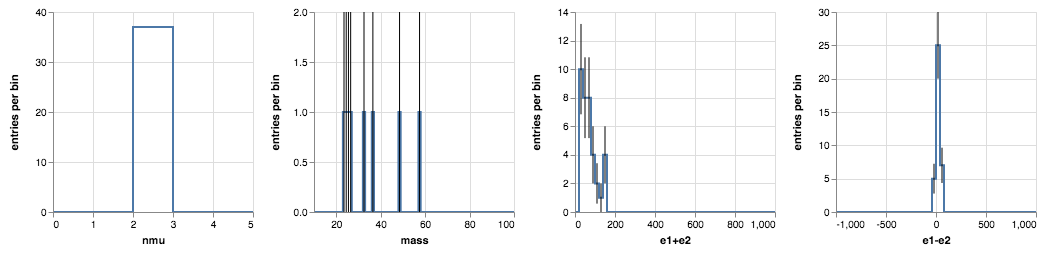

In [9]:
beside(hnmu.step("nmu"),
    h_mass.step("mass", error=True),
    h_e_plus_e.step("e1+e2", error=True),
    h_e_minus_e.step("e1-e2", error=True)
      ).to(canvas)   

In [7]:
h_mass.pandas()

,count(),err(count())
mass,,
"[-inf, 10.0)",2242.0,47.349762
"[10.0, 11.0)",16.0,4.000000
"[11.0, 12.0)",28.0,5.291503
"[12.0, 13.0)",25.0,5.000000
"[13.0, 14.0)",14.0,3.741657
"[14.0, 15.0)",11.0,3.316625
"[15.0, 16.0)",13.0,3.605551
"[16.0, 17.0)",15.0,3.872983
"[17.0, 18.0)",18.0,4.242641


In [9]:
int(-0.4)

0

In [8]:
import numpy as np
np.arange(10)*5.0

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.])

In [6]:
class B:
    def test(self):
        print self.__class__.__name__
        
class D(B):
    pass

d = D()
d.test()

D


In [9]:
import numpy as np
x = np.random.random((20,))
inx1 = [1,2,13,11,7]
inx2 = np.array([False]*20)
for i in inx1:
    inx2[i] = True
    
x1 = x[inx1]
x2 = x[inx2]

print x
print x1
print x2

[ 0.31795505  0.84071748  0.49867921  0.82821155  0.64011022  0.16523232
  0.89966512  0.217819    0.52535221  0.56096898  0.03879729  0.13073188
  0.1967658   0.82442232  0.21027325  0.43648561  0.39004707  0.66791188
  0.53800771  0.24144541]
[ 0.84071748  0.49867921  0.82442232  0.13073188  0.217819  ]
[ 0.84071748  0.49867921  0.217819    0.13073188  0.82442232]


In [10]:
print x > 0.5

[False  True False  True  True False  True False  True  True False False
 False  True False False False  True  True False]


In [11]:
x[x>0.5]

array([ 0.84071748,  0.82821155,  0.64011022,  0.89966512,  0.52535221,
        0.56096898,  0.82442232,  0.66791188,  0.53800771])

In [17]:
print (x>0.5) * (x>0.7)

[False  True False  True False False  True False False False False False
 False  True False False False False False False]


In [16]:
x1.base